c:\Users\TOP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TOP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TOP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50937 (\N{HANGUL SYLLABLE WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TOP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TOP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TOP\anaconda3\Lib\site-package

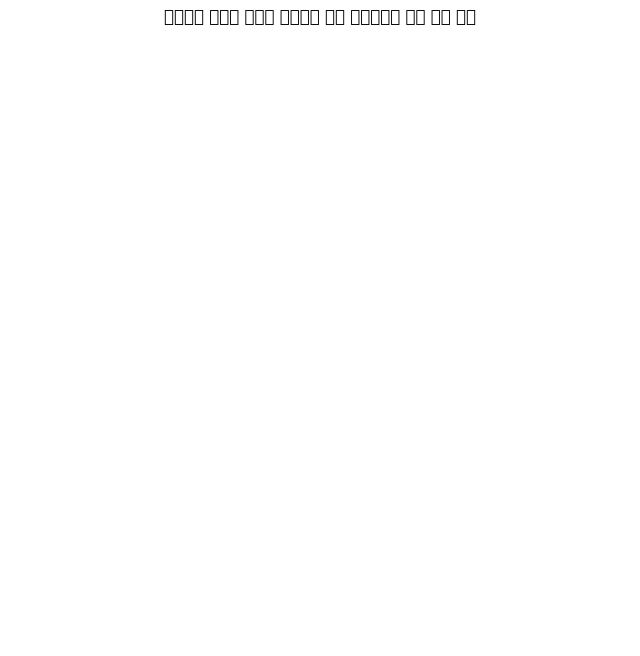

In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# 파일 경로 설정
cards_data_path = '../dataset/cards_data.csv'
transactions_data_path = '../dataset/transactions_data.csv'
train_fraud_labels_path = '../dataset/train_fraud_labels.json'

# 1. transactions_data.csv 파일 읽기
transactions_data = pd.read_csv(transactions_data_path)

# 2. train_fraud_labels.json 파일 읽기
with open(train_fraud_labels_path, 'r') as f:
    fraud_labels = json.load(f)['target']  # 사기 여부 데이터는 'target' 키 아래에 있음

# 3. transactions_data와 train_fraud_labels 결합
# transactions_data의 'id'와 train_fraud_labels의 'id'가 매칭된다고 가정
transactions_data['fraud'] = transactions_data['id'].map(fraud_labels)

# 4. cards_data.csv 파일 읽기 (카드 정보)
cards_data = pd.read_csv(cards_data_path)

# 5. transactions_data와 cards_data 결합 (card_id 기준)
merged_data = transactions_data.merge(cards_data[['id', 'card_on_dark_web']], left_on='card_id', right_on='id', how='left')

# 6. 사기 거래 여부에 따른 다크웹 노출 카드의 거래 수 계산
fraud_dark_web = merged_data[merged_data['fraud'] == 'Yes']['card_on_dark_web'].value_counts()

# 7. 원형 차트로 시각화 (다크웹에 노출된 카드와 유출되지 않은 카드에서의 사기 거래 비율)
labels = fraud_dark_web.index  # 'Yes'와 'No'에 해당하는 라벨
sizes = fraud_dark_web.values  # 각 라벨에 해당하는 사기 거래 수

# 8. 원형 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('다크웹에 유출된 카드와 유출되지 않은 카드에서의 사기 거래 비율')
plt.axis('equal')  # 원형 차트를 원 모양으로 유지
plt.show()